In [43]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#wrangling
import pandas as pd
import numpy as np
import seaborn as sns

import os
from env import get_connection
#exploring
import scipy.stats as stats

#Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
#default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare

In [28]:
# Create SQL query.
sql_query = 'SELECT * FROM mall_customers.customers;'
# Read in dataframe from Codeup db
df = pd.read_sql(sql_query, get_connection('mall_customers'))

In [38]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df= df.drop(columns=['customer_id'])
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


This data has 200 observations and 4 features. No Null values. 

### Detecting outliers

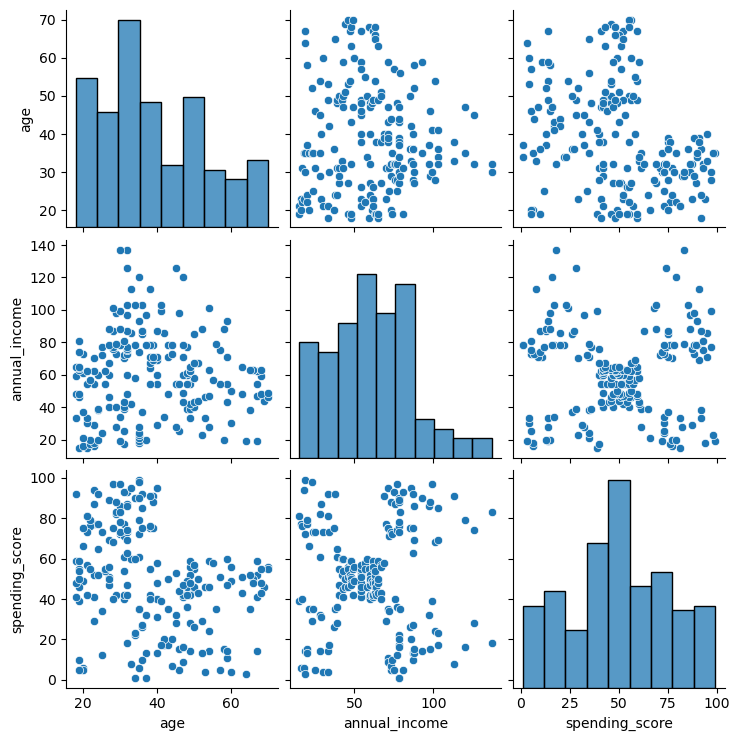

In [44]:
# Create a pairplot for the DataFrame
sns.pairplot(df)

# Show the pairplot
plt.show()

calculating IQR for one specific column

In [45]:
def get_upper_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])